https://www.youtube.com/watch?app=desktop&v=9v09i-35HAM

In [1]:
# importazione delle librerie richieste
import numpy as np
import pandas as pd   

In [2]:
# caricare il dataframe dal file csv
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [ ]:
# visionare una sola serie del dataframe
df['Survived']

In [ ]:
# per contare il numero di occorrenze di ogni valore della serie possiamo usare il metodo value_count()
df['Survived'].value_counts()

In [ ]:
# per accedere a più serie basta mettere una lista nelle parentesi quadre del dataframe
df[['Name', 'Survived']]

In [16]:
# selezionare righe e colonne:
# con iloc con un indice di posizione
# con loc con i label

# ILOC
df.iloc[0:2]      # la sintassi e' riga, colonna
df.iloc[:,-1]

# LOC[riga, label]
df.loc[:, 'Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
# statistiche dei dati già pronti
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# serie mostrante il tipo di dati inseriti nel dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
# indivuare i valori mancanti nel dataframe. REstituisce una taballa con true se mancano i dati nella cella e con la funzione sum andiamo a vedere
# la somma
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# rimuovere la colonna cabina che ha tanti elementi mancanti
df.drop('Cabin', axis=1, inplace=True)      # axis = 1 vuol dire che deve cancellare la colonna 0  riga

# se vogliamo cancellare piu colonne basta inserire un parametro chiamato columns e una lista di label 
df.drop(columns=['Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
# metodo Corr per mostrare le correlazioni tra le colonne
df.corr()

<AxesSubplot:>

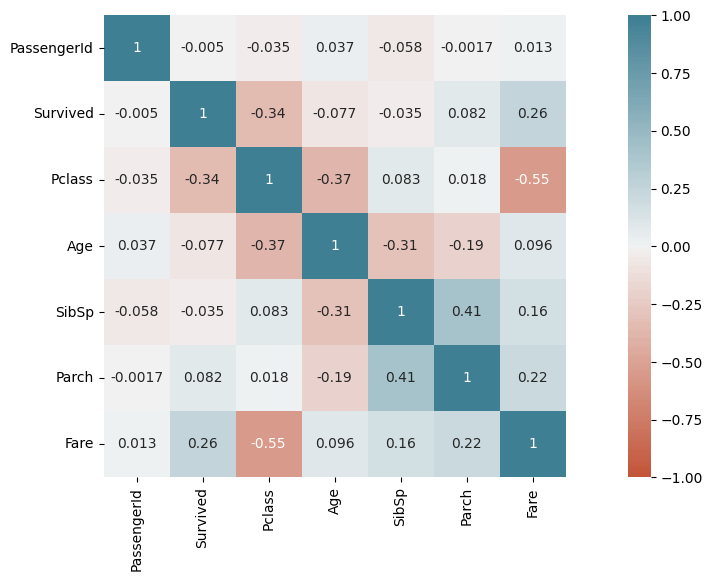

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

fig, ax = plt.subplots(figsize=(16,6))

sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

CERCARE DEI PATTERN NEL DATAFRAME

GROUPBY()

Aggregare dei dati in base a delle classi appartenenti ad una determinata colonna

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


<AxesSubplot:xlabel='Pclass'>

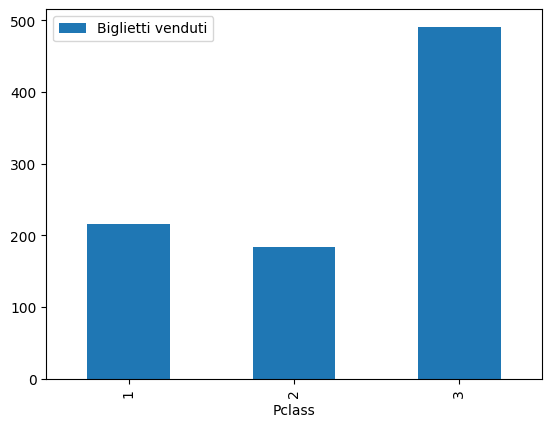

In [40]:
# Quanti biglietti sono stati venduti divisi per classi

pclass_df = df.groupby('Pclass').count()
# l+indice del dataframe nuovo diventa la colonna su cui abbiamo fatto l'aggregazione
pclass_df = pclass_df['PassengerId'].to_frame(name='Biglietti venduti')
pclass_df.plot(kind='bar')

<AxesSubplot:xlabel='Pclass'>

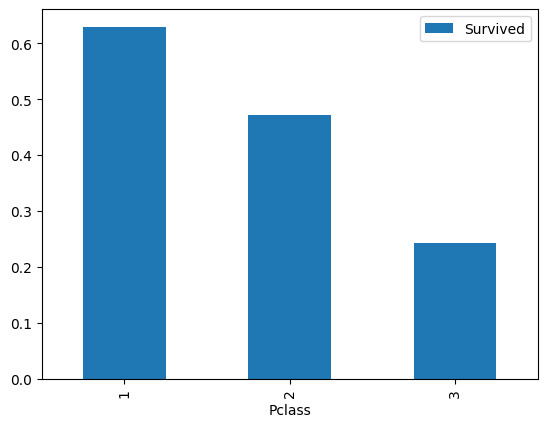

In [47]:
# Quante persone sono sopravvissute per ogni classe in percentuale
df_survived = df[['Pclass', 'Survived']].groupby('Pclass').mean()
# per resettare l'index usare il metoto reset_index()
df_survived.plot(kind='bar')

,Survived
Sex,
female,233
male,109


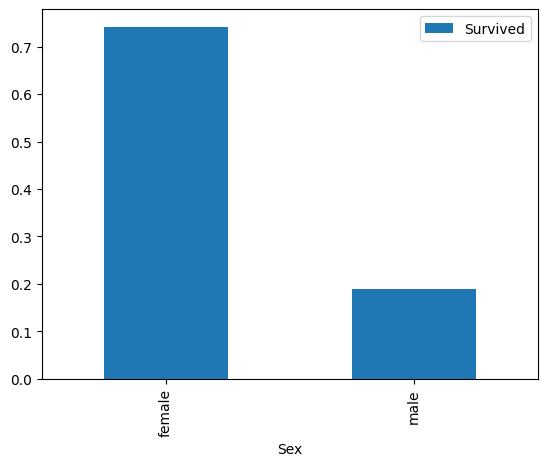

In [48]:
# analisi sul sesso delle persone con la frequenza di sopravvivenza
df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

# per contare esattamente quante persone in termine assoluto
df[['Survived', 'Sex']].groupby('Sex').sum()



,Survived,Total,%
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


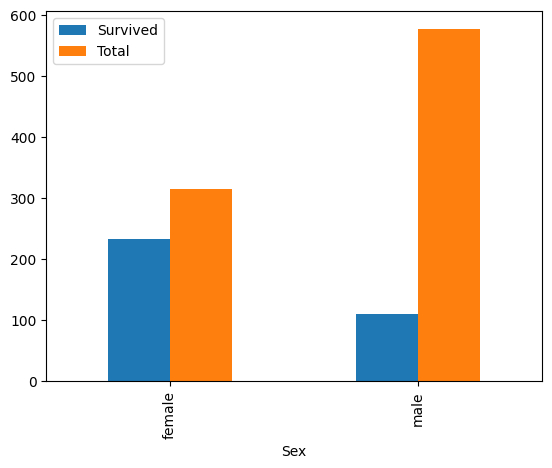

In [51]:
df_survived = df[['Survived', 'Sex']].groupby('Sex').sum()
df_survived['Total'] = df[['Survived', 'Sex']].groupby('Sex').count()
df_survived.plot(kind='bar')
df_survived['%'] = (df_survived['Survived']*100)/df_survived['Total']
df_survived

In [61]:
# vediamo se letà dei passeggeri è correlabile alla sopravvivenza
# usiamo un filtro sulla colonna etä usando le proprietà di pandas

# Bambini
children_df = df[df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250


In [59]:
# bamnbini totali li conto con la funzione shape che mi conta il numero di righe del df
total_children = children_df.shape[0]
total_children

113

In [60]:
# totali bambini sopravvissuti
children_survived = children_df['Survived'].sum()
children_survived

61

In [63]:
# Adulti
adults_df = df[df['Age'] > 17]

# rinominiamo la colonna Sex in People con il metodo rename()
adults_df = adults_df.rename(columns={'Sex':'People'})


,PassengerId,Survived,Pclass,Name,People,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [67]:
# adulti sopravvissuti
survivovors_df = adults_df[['Survived', 'People']].groupby('People').sum()
survivovors_df['Total'] = adults_df[['Survived', 'People']].groupby('People').count()
survivovors_df['%'] = (survivovors_df['Survived']*100)/survivovors_df['Total']
survivovors_df
#survivovors_df.plot(kind='bar')

,Survived,Total,%
People,,,
female,159,206,77.184466
male,70,395,17.721519


<AxesSubplot:xlabel='People'>

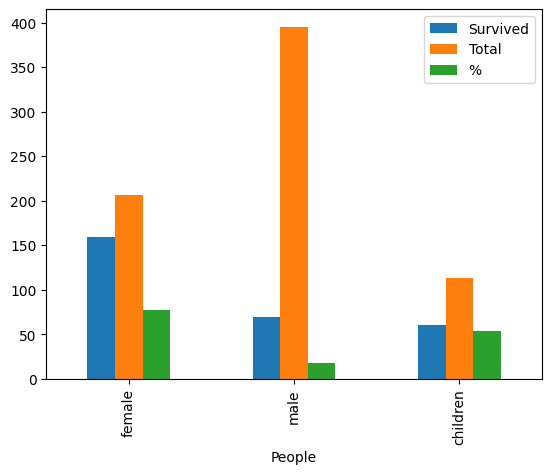

In [69]:
# per aggiungere una nuova riga al dataframe dei sopravvisuti con i dati dei bambini usiamo il metodo loc che ci consente di usare i label
# in questo caso l'indice del dataframe è espresso in label e non in numeri

survivovors_df.loc['children'] = [children_survived, total_children, (children_survived*100)/total_children]
survivovors_df.plot(kind='bar')

<AxesSubplot:xlabel='family_size'>

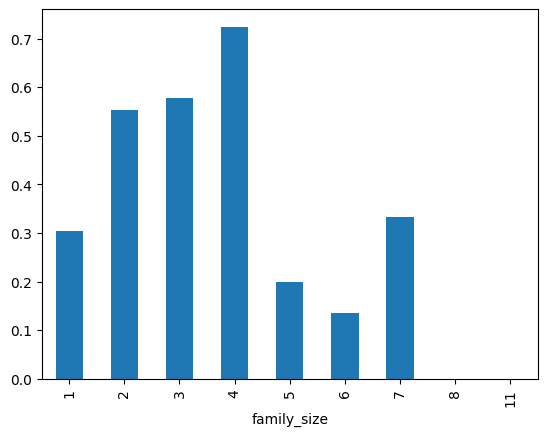

In [72]:
# calcoliamo se la grandezza della famiglia aveva un impatto sulla sopravvivenza
df['family_size'] = 1 + df['SibSp'] + df['Parch']
df.groupby('family_size').mean()['Survived'].plot(kind='bar')


In [73]:
# vediamo se il titolo della persona era determinante
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [74]:
# creiamo la colonna dei titoli delle persone usando una funzione lambda
df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,1,Mr


<AxesSubplot:xlabel='Title'>

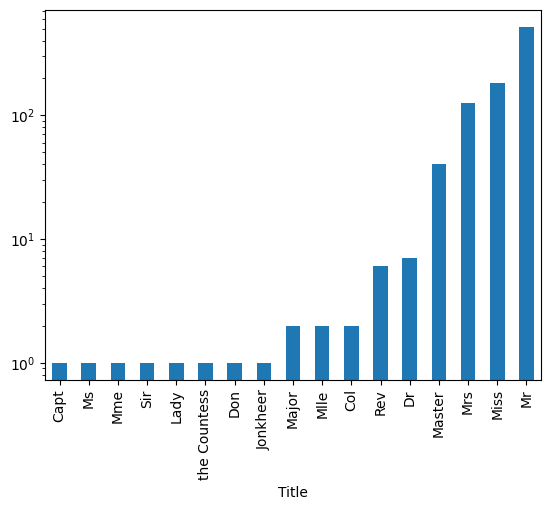

In [78]:
# contiamo quanti sono per titolo e ordiniamo in modo crescente sulla colonna del passenger id e poi plottiamo
df.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

<AxesSubplot:xlabel='Title'>

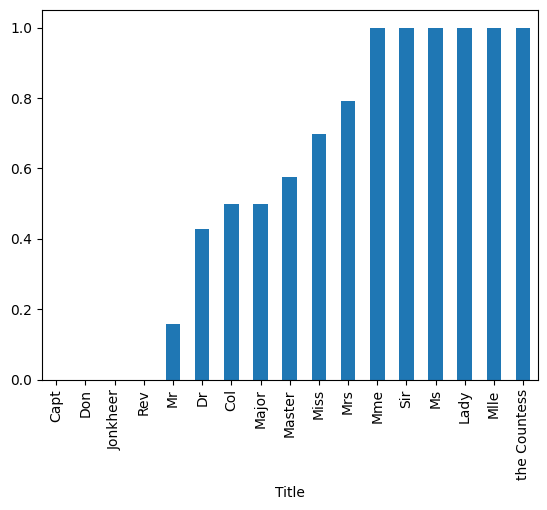

In [80]:
# calcoliamo la media e ordiniamola e plottiamola
df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')

In [82]:
# per avere un conteggio visualizzato com dataframe uso le [[]] quando richiamo la colonna
df.groupby('Title').count()[['PassengerId']]

,PassengerId
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182
